In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime
"""pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)"""

"pd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)\npd.set_option('display.width', 1000)"

### Loading the Dataaset in Pandas Dataframe

In [2]:
Data_dir = '/content/drive/My Drive/Colab Notebooks/DataSets/MachineHack Competition/'
train = pd.read_csv(Data_dir+ 'Train.csv')
test = pd.read_csv(Data_dir + 'Test.csv')

In [3]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [4]:
train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [ ]:
train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Transforming The Data

In [ ]:
def df_trans(train):
  train['Date_Time'] = pd.to_datetime(train['InvoiceDate'])
  train['Date'] = train['Date_Time'].dt.date
  train['Year'] = train['Date_Time'].dt.year
  train['Month'] = train['Date_Time'].dt.month
  train['Day'] = train['Date_Time'].dt.day
  train['Time'] = train['Date_Time'].dt.time
  train['Weekday'] = train['Date_Time'].dt.weekday
  train['Timelight'] = train['Time'].apply(lambda x : 'Morning' if 6<=x.hour<12 else ('Noon' if 12<=x.hour<18 else 'Night' ))
  train.drop(['InvoiceDate','Date_Time','Time','InvoiceNo','Date_Time','Date','CustomerID'],axis = 1,inplace=True)
  day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
  train['Weekday'] = train['Weekday'].apply(lambda x: day_name[x])
  #train['Quantity'] = abs(train['Quantity'])
  train['Month'] = train['Month'].apply(lambda x: 'Q1' if x in range(1,4) else ( 'Q2' if x in range(4,7) else ( 'Q3' if x in range(7,10) else 'Q')) )
  train['Day'] = train['Day'].apply(lambda x: 'week1' if x in range(1,8) else ( 'week2' if x in range(8,15) else ( 'week3' if x in range(15,22) else 'week4')) )
  return train

In [ ]:
df = df_trans(train)
df_test = df_trans(test)

In [ ]:
df.head(15)

,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Day,Weekday,Timelight
0,1583,144,3,3.75,35,2011,Q2,week1,Friday,Noon
1,1300,3682,6,1.95,35,2011,Q2,week2,Wednesday,Morning
2,2178,1939,4,5.95,35,2011,Q,week3,Sunday,Noon
3,2115,2983,1,0.83,35,2011,Q,week4,Tuesday,Noon
4,1210,2886,12,1.65,35,2011,Q2,week1,Friday,Morning
5,495,3247,5,1.65,35,2011,Q,week4,Sunday,Noon
6,165,3377,1,1.25,35,2011,Q,week2,Thursday,Night
7,2597,3435,1,1.25,35,2011,Q,week4,Wednesday,Noon
8,1945,2352,1,5.75,35,2011,Q,week4,Wednesday,Noon
9,3311,2502,6,2.95,35,2011,Q2,week4,Wednesday,Morning


### Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


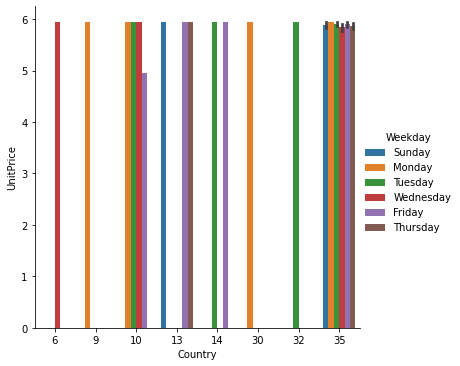

In [ ]:
sns.factorplot("Country", "UnitPrice", "Weekday", data = df[df['StockCode'] == 2178], kind="bar")

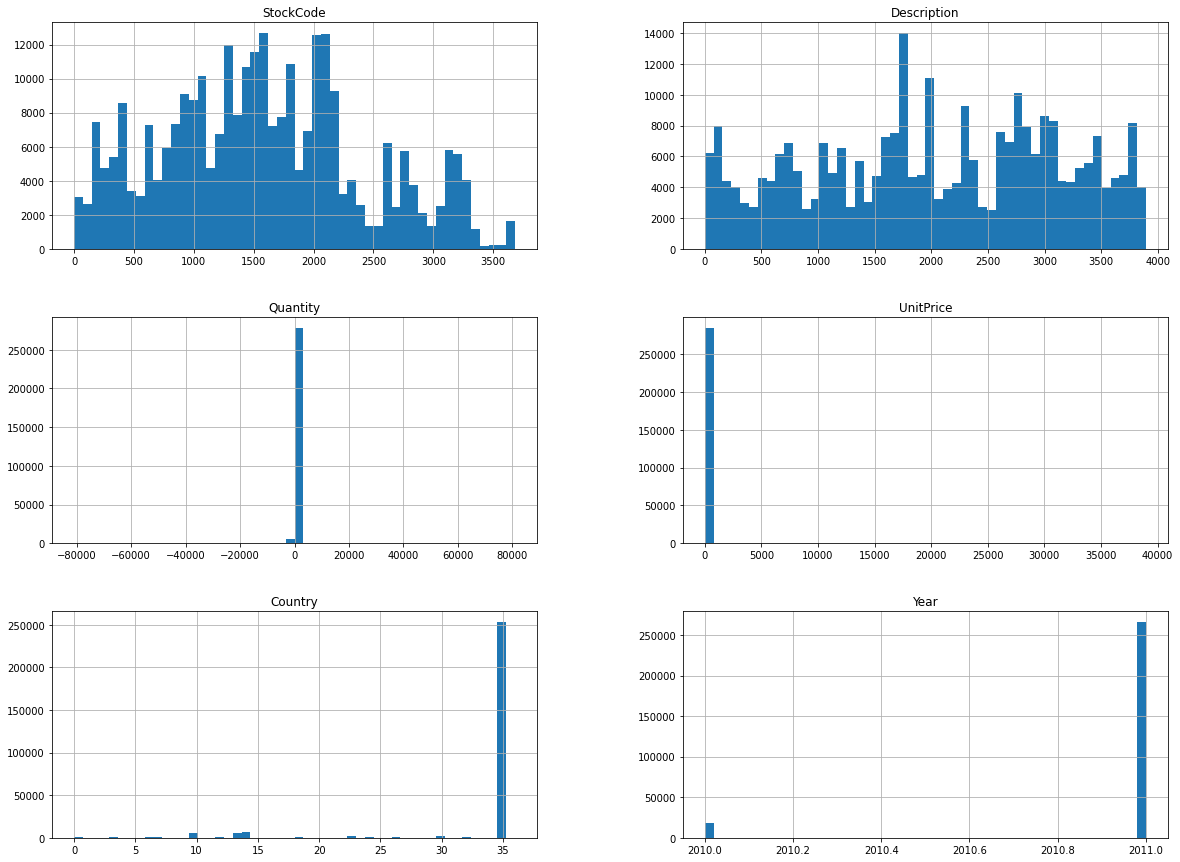

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

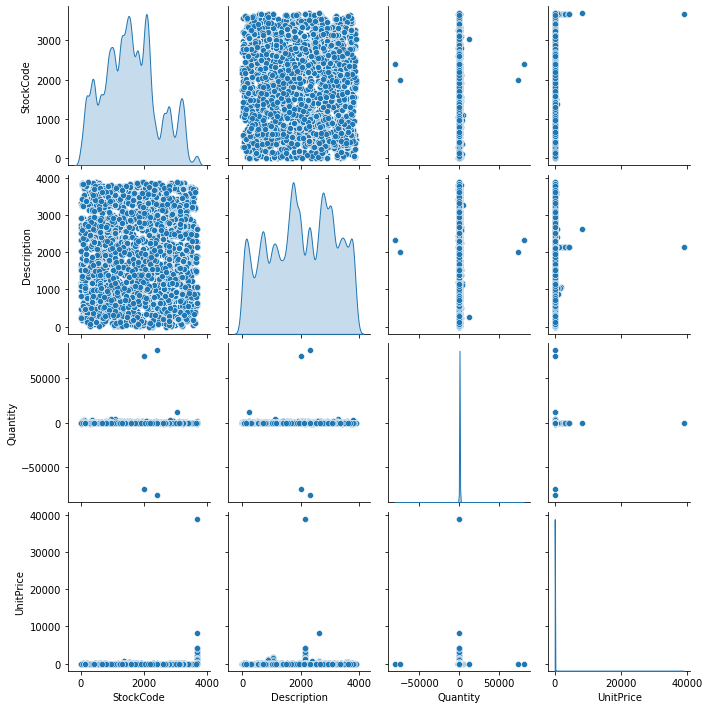

In [ ]:
sns.pairplot(df[['StockCode', 'Description', 'Quantity', 'UnitPrice']], diag_kind='kde')


In [ ]:
df.columns

Index(['StockCode', 'Description', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Day', 'Weekday', 'Timelight'],
      dtype='object')

In [ ]:
#sns.pairplot(train,kind="reg")
corr_matrix = df.corr()
corr_matrix['UnitPrice'].sort_values(ascending=False)

UnitPrice      1.000000
StockCode      0.020073
Year           0.000838
Description   -0.000424
Quantity      -0.000924
Day           -0.000975
Month         -0.002478
Country       -0.005378
Name: UnitPrice, dtype: float64

In [ ]:
df.skew()

StockCode        0.271247
Description     -0.133967
Quantity         0.226115
UnitPrice      438.340508
Country         -3.050125
Year            -3.493117
Month           -0.444239
Day              0.118156
dtype: float64

### Scaling(Numerical Data) and Onehotencoding(Categorical Data) and making Pipelines

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
num_pipeline = Pipeline([('norm_scaler', MinMaxScaler())])


In [ ]:
df.columns

Index(['StockCode', 'Description', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Day', 'Weekday', 'Timelight'],
      dtype='object')

In [ ]:
train_x = df[['StockCode', 'Description', 'Quantity', 'Country','Month','Day','Year','Weekday']]
train_y = df['UnitPrice']

In [ ]:
"""
from sklearn.preprocessing import PowerTransformer
y = train_y
y = y.values.reshape(-1,1)
power = PowerTransformer( method='yeo-johnson',standardize=True)
y = power.fit_transform(y)
train_y = pd.DataFrame(data=y)
"""

"\nfrom sklearn.preprocessing import PowerTransformer\ny = train_y\ny = y.values.reshape(-1,1)\npower = PowerTransformer( method='yeo-johnson',standardize=True)\ny = power.fit_transform(y)\ntrain_y = pd.DataFrame(data=y)\n"

In [ ]:

train_y.skew()

438.3405083657168

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ['StockCode', 'Description', 'Quantity']
cat_attribs = [ 'Year','Weekday','Month','Country','Day']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_x_t = full_pipeline.fit_transform(train_x)
print(train_x_t.shape)
test_x = full_pipeline.fit_transform(df_test)

(284780, 56)


### Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
pipelines.append(('LASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('EN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
pipelines.append(('KNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('TREE', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('GBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.993370 (0.003490)
ScaledLASSO: -1.000006 (0.003312)
ScaledEN: -1.000006 (0.003312)
ScaledKNN: -0.943302 (0.005223)
ScaledCART: -0.256179 (0.008689)
ScaledGBM: -0.724415 (0.005094)


### Linear Regression Model 



In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_x_t, train_y)
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(train_x_t)
lin_mse = mean_squared_error(train_y, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

78.33477916729974

### Decision Tree Regressor

In [ ]:

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=55)
tree_reg.fit(train_x_t, train_y)

predictions = tree_reg.predict(train_x_t)
tree_mse = mean_squared_error(train_y, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

8.688241900752903

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_x_t,train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 31.6004593   12.78373306  22.19335328  32.67625263 231.40408751
  17.76776768   9.73699159 232.23409809  49.44619129  48.81290049]
Mean: 68.86558349148757
Standard deviation: 82.47197407135778


### Random Forest Regressor

In [ ]:


from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50, random_state=100)
forest_reg.fit(train_x_t, train_y)
predictions = forest_reg.predict(train_x_t)
forest_mse = mean_squared_error(train_y, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


32.230041646585434

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_x_t,train_y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)  
display_scores(forest_rmse_scores)

Scores: [ 64.48183804  41.98477293  20.1959896   38.07263408 229.74317249
  22.06459315  18.55855657  28.6683213   54.18985444  11.63733283]
Mean: 52.959706541829505
Standard deviation: 61.02274901173678


### **Support Vector Machine**

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(train_x_t,train_y)
predictions = svm_reg.predict(train_x_t)
svm_mse = mean_squared_error(train_y, predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

78.41224859198064

### KNN Regressor

In [ ]:

# Using K_Nearest neighbour regressor
# running for different K values to know which yields the max accuracy.
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):    
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(train_x_t, train_y)
    y_pred = clf.predict(train_x_t)
    print("At K = {}  Score is {} & RMSE is {}".format(k,clf.score(train_x_t,train_y),np.sqrt(mean_squared_error(train_y,y_pred))))
    score.append(clf.score(train_x_t,train_y))
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))


At K = 1  Score is 0.9690936637856544 & RMSE is 13.78277036758413
At K = 2  Score is 0.9845791699138666 & RMSE is 9.735687697384844
At K = 3  Score is 0.9861863775490987 & RMSE is 9.21438913404168
At K = 4  Score is 0.9859780562937269 & RMSE is 9.283609574029644
At K = 5  Score is 0.9857997886108779 & RMSE is 9.34243667663364
At K = 6  Score is 0.9866923055469335 & RMSE is 9.044075278471182
At K = 7  Score is 0.9869175977766633 & RMSE is 8.967192788630376
At K = 8  Score is 0.9869243221898224 & RMSE is 8.964887903845012
At K = 9  Score is 0.9869982521276558 & RMSE is 8.939508221657013
At K = 10  Score is 0.9869982521283479 & RMSE is 8.939508221419088
At K = 11  Score is 0.9869982521283803 & RMSE is 8.939508221407928
At K = 12  Score is 0.9869982521283803 & RMSE is 8.939508221407928
At K = 13  Score is 0.9869982521283803 & RMSE is 8.939508221407928
At K = 14  Score is 0.9869982521283803 & RMSE is 8.939508221407928
At K = 15  Score is 0.9869982521283803 & RMSE is 8.939508221407928
At K =

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors = 10,  weights = 'distance', p=1)
clf.fit(train_x_t, train_y)
print(clf.score(train_x_t,train_y ))   
y_pred = clf.predict(train_x_t)
knn_mse = mean_squared_error(train_y,y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.9869982521283479


8.939508221419088

In [ ]:
results = tree_reg.predict(test_x)
result = pd.DataFrame(data=results)
result.head()

,0
0,1.45
1,1.25
2,3.39
3,1.45
4,10.95


In [ ]:
a_inverse_transformed = power.inverse_transform(result)
result = pd.DataFrame(data=a_inverse_transformed).round(2)
result.head()


,0
0,1.45
1,0.75
2,3.75
3,1.45
4,10.95


### Neural Network (TensorFlow And Keras)





In [ ]:
df.head(1)

,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Day,Weekday,Timelight
0,1583,144,3,3.75,35,2011,Q2,week1,Friday,Noon


In [ ]:
X = df[['StockCode', 'Quantity', 'Country','Year','Month','Day','Weekday','Timelight','Description']]
y = df['UnitPrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=None)

In [ ]:
for var in [X_train, X_test, y_train, y_test]:
  print( var.shape)

(227824, 9)
(56956, 9)
(227824,)
(56956,)


In [ ]:
X_train  = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)
for var in [X_train, X_test, y_train, y_test]:
  print( var.shape)

(227824, 56)
(56956, 56)
(227824,)
(56956,)


In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import tensorflow as tf
import torch
model = Sequential()
model.add(Dense(56, input_dim=56, kernel_initializer='normal', activation='relu'))
model.add(Dense(29, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=10)

predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))

Epoch 1/100
22783/22783 [==============================] - 50s 2ms/step - loss: 622.1380 - accuracy: 2.5458e-04
Epoch 2/100
22783/22783 [==============================] - 51s 2ms/step - loss: 609.7910 - accuracy: 2.5458e-04
Epoch 3/100
22783/22783 [==============================] - 50s 2ms/step - loss: 591.1173 - accuracy: 2.5458e-04
Epoch 4/100
22783/22783 [==============================] - 50s 2ms/step - loss: 576.1887 - accuracy: 2.5458e-04
Epoch 5/100
22783/22783 [==============================] - 50s 2ms/step - loss: 566.4746 - accuracy: 2.5458e-04
Epoch 6/100
22783/22783 [==============================] - 50s 2ms/step - loss: 551.5853 - accuracy: 2.5458e-04
Epoch 7/100
22783/22783 [==============================] - 50s 2ms/step - loss: 548.3176 - accuracy: 2.5458e-04
Epoch 8/100
22783/22783 [==============================] - 50s 2ms/step - loss: 537.9146 - accuracy: 2.5458e-04
Epoch 9/100
22783/22783 [==============================] - 49s 2ms/step - loss: 523.2838 - accuracy: 2.5

In [ ]:

from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
import torch
from sklearn.metrics import mean_squared_error


X  = full_pipeline.fit_transform(X)
def build_and_compile_model():
  model = Sequential([
      layers.Dense(56, input_dim=56, kernel_initializer='normal', activation='relu'),
      layers.Dense(35, kernel_initializer='normal', activation='relu'),
      layers.Dense(25, kernel_initializer='normal', activation='relu'),
      layers.Dense(1, kernel_initializer='normal')
  ])

  model.compile(loss='mean_absolute_error',
                optimizer='adam')
  return model

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=build_and_compile_model(), epochs=100, batch_size=10, verbose=1)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X, y.values, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))


AttributeError: ignored

### Submission

In [ ]:
submission_format = pd.read_csv(Data_dir +'Sample Submission.csv')
my_submission = pd.DataFrame(data=result.values,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.to_csv(Data_dir+'submission_tree_5.csv',index = False)